In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Load data from csv file using pandas

In [3]:
df = pd.read_csv(r"C:\Users\USER\Desktop\SET_PROJECT1\data.csv", encoding='latin1', low_memory=False)

In [4]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


## Information of the data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


## Summary statistics of the data set

In [6]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


## Missing values in each columns

In [7]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df) * 100

In [8]:
missing_percentages

pm2_5                          97.862497
spm                            54.478797
agency                         34.304933
stn_code                       33.064749
rspm                            9.230692
so2                             7.951035
location_monitoring_station     6.309009
no2                             3.725370
type                            1.237659
date                            0.001606
location                        0.000688
sampling_date                   0.000688
state                           0.000000
dtype: float64

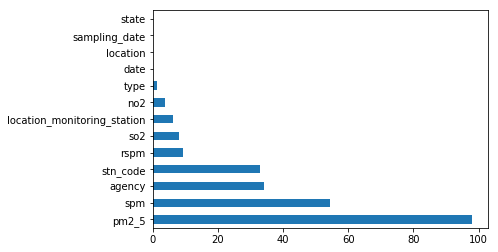

In [9]:
missing_percentages.plot(kind="barh")

In [10]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990


## Convert date column to pandas date formt

In [11]:
df["date"] = pd.to_datetime(df["date"], infer_datetime_format=True)

In [12]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


## Select data from 2010 to 2015 only

In [13]:
start_date = '2010-01-01'
end_date = '2015-12-31'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249219 entries, 11016 to 435738
Data columns (total 13 columns):
stn_code                       248054 non-null object
sampling_date                  249219 non-null object
state                          249219 non-null object
location                       249219 non-null object
agency                         248054 non-null object
type                           249219 non-null object
so2                            242486 non-null float64
no2                            244049 non-null float64
rspm                           246373 non-null float64
spm                            28736 non-null float64
location_monitoring_station    249219 non-null object
pm2_5                          9314 non-null float64
date                           249219 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 26.6+ MB


## Check missing values for 2010-2015 data

In [15]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df) * 100

In [16]:
missing_percentages

pm2_5                          96.262725
spm                            88.469579
so2                             2.701640
no2                             2.074481
rspm                            1.141968
agency                          0.467460
stn_code                        0.467460
date                            0.000000
location_monitoring_station     0.000000
type                            0.000000
location                        0.000000
state                           0.000000
sampling_date                   0.000000
dtype: float64

## Drop pm2_5 and spm columns as they have around 98% to 89% missing data

In [17]:
df = df.drop(["pm2_5", "spm"], axis=1)

In [18]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,location_monitoring_station,date
11016,582,2/3/2010,Andhra Pradesh,Chittoor,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,9.0,36.0,"GNC Toll Gate Tirumala , Chittoor Dist.",2010-03-02
11017,582,2/5/2010,Andhra Pradesh,Chittoor,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,9.0,41.0,"GNC Toll Gate Tirumala , Chittoor Dist.",2010-05-02
11018,582,2/9/2010,Andhra Pradesh,Chittoor,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,9.0,37.0,"GNC Toll Gate Tirumala , Chittoor Dist.",2010-09-02
11019,582,2/11/2010,Andhra Pradesh,Chittoor,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,9.0,40.0,"GNC Toll Gate Tirumala , Chittoor Dist.",2010-11-02
11020,582,15-02-10,Andhra Pradesh,Chittoor,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,9.0,44.0,"GNC Toll Gate Tirumala , Chittoor Dist.",2010-02-15


In [19]:
df.describe()

,so2,no2,rspm
count,242486.000000,244049.000000,246373.000000
mean,9.710775,24.900738,107.862011
std,10.862109,18.482360,74.359721
min,0.000000,0.000000,0.000000
25%,4.000000,13.000000,56.000000
50%,7.000000,21.000000,89.000000
75%,13.000000,31.000000,140.000000
max,909.000000,876.000000,6307.033333


In [20]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df) * 100
missing_percentages

so2                            2.701640
no2                            2.074481
rspm                           1.141968
agency                         0.467460
stn_code                       0.467460
date                           0.000000
location_monitoring_station    0.000000
type                           0.000000
location                       0.000000
state                          0.000000
sampling_date                  0.000000
dtype: float64

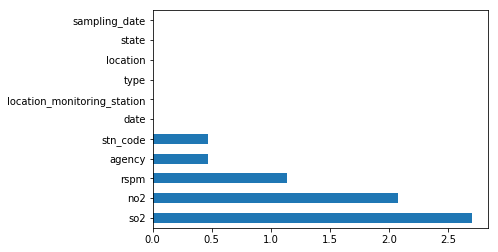

In [21]:
missing_percentages.plot(kind = "barh")

## Fill missing values with previous value for each city in consideration (Mumbai, Delhi, Chennai, Kolkota, Hydrabad, Bangaluru)

In [22]:
df_mumbai = df[df['location'] == 'Mumbai']
df_delhi = df[df['location'] == 'Delhi']
df_chennai = df[df['location'] == 'Chennai']
df_kolkata = df[df['location'] == 'Kolkata']
df_hyderabad = df[df['location'] == 'Hyderabad']
df_hyderabad = df[df['location'] == 'Hyderabad']
df_bangaluru = df[df['location'] == "Bangalore"]
df_bangaluru.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,location_monitoring_station,date
141782,NaN,1/2/2009,Karnataka,Bangalore,NaN,Industrial Areas,18.0,45.9,583.0,Graphite India,2010-02-01
141783,NaN,1/6/2009,Karnataka,Bangalore,NaN,Industrial Areas,17.9,40.3,199.0,Graphite India,2010-06-01
141784,NaN,1/7/2009,Karnataka,Bangalore,NaN,Industrial Areas,17.4,39.6,323.0,Graphite India,2010-07-01
141785,NaN,1/10/2009,Karnataka,Bangalore,NaN,Industrial Areas,18.2,44.2,259.0,Graphite India,2010-10-01
141786,NaN,1/11/2009,Karnataka,Bangalore,NaN,Industrial Areas,18.2,42.9,133.0,Graphite India,2010-11-01
141787,NaN,13/1/2009,Karnataka,Bangalore,NaN,Industrial Areas,17.4,40.4,83.0,Graphite India,2010-01-13
141788,NaN,15/1/2009,Karnataka,Bangalore,NaN,Industrial Areas,17.7,40.9,189.0,Graphite India,2010-01-15
141789,NaN,19/1/2009,Karnataka,Bangalore,NaN,Industrial Areas,12.4,44.2,377.0,Graphite India,2010-01-19
141790,NaN,23/1/2009,Karnataka,Bangalore,NaN,Industrial Areas,13.5,43.8,410.0,Graphite India,2010-01-23
141791,NaN,27/1/2009,Karnataka,Bangalore,NaN,Industrial Areas,13.1,42.2,254.0,Graphite India,2010-01-27


In [23]:
# df_mumbai[df_mumbai.isna().any(axis=1)]
# df_delhi[df_delhi.isna().any(axis=1)]
# df_chennai[df_chennai.isna().any(axis=1)]
# df_kolkata[df_kolkata.isna().any(axis=1)]
# df_hyderabad[df_hyderabad.isna().any(axis=1)]
df_bangaluru[df_bangaluru.isna().any(axis=1)].head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,location_monitoring_station,date
141782,NaN,1/2/2009,Karnataka,Bangalore,NaN,Industrial Areas,18.0,45.9,583.0,Graphite India,2010-02-01
141783,NaN,1/6/2009,Karnataka,Bangalore,NaN,Industrial Areas,17.9,40.3,199.0,Graphite India,2010-06-01
141784,NaN,1/7/2009,Karnataka,Bangalore,NaN,Industrial Areas,17.4,39.6,323.0,Graphite India,2010-07-01
141785,NaN,1/10/2009,Karnataka,Bangalore,NaN,Industrial Areas,18.2,44.2,259.0,Graphite India,2010-10-01
141786,NaN,1/11/2009,Karnataka,Bangalore,NaN,Industrial Areas,18.2,42.9,133.0,Graphite India,2010-11-01


In [24]:
#fill NaN using forward fill technique
# df_mumbai.fillna(method='ffill', inplace=True)
# df_delhi.fillna(method='ffill', inplace=True)
# df_chennai.fillna(method='ffill', inplace=True)
df_hyderabad.fillna(method='ffill', inplace=True)
df_bangaluru.fillna(method='ffill', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [25]:
# df_mumbai[df_mumbai.isna().any(axis=1)]
# df_delhi[df_delhi.isna().any(axis=1)]
# df_chennai[df_chennai.isna().any(axis=1)]
# df_hyderabad[df_hyderabad.isna().any(axis=1)]
df_bangaluru[df_bangaluru.isna().any(axis=1)]

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,location_monitoring_station,date
141782,NaN,1/2/2009,Karnataka,Bangalore,NaN,Industrial Areas,18.0,45.9,583.0,Graphite India,2010-02-01
141783,NaN,1/6/2009,Karnataka,Bangalore,NaN,Industrial Areas,17.9,40.3,199.0,Graphite India,2010-06-01
141784,NaN,1/7/2009,Karnataka,Bangalore,NaN,Industrial Areas,17.4,39.6,323.0,Graphite India,2010-07-01
141785,NaN,1/10/2009,Karnataka,Bangalore,NaN,Industrial Areas,18.2,44.2,259.0,Graphite India,2010-10-01
141786,NaN,1/11/2009,Karnataka,Bangalore,NaN,Industrial Areas,18.2,42.9,133.0,Graphite India,2010-11-01
141787,NaN,13/1/2009,Karnataka,Bangalore,NaN,Industrial Areas,17.4,40.4,83.0,Graphite India,2010-01-13
141788,NaN,15/1/2009,Karnataka,Bangalore,NaN,Industrial Areas,17.7,40.9,189.0,Graphite India,2010-01-15
141789,NaN,19/1/2009,Karnataka,Bangalore,NaN,Industrial Areas,12.4,44.2,377.0,Graphite India,2010-01-19
141790,NaN,23/1/2009,Karnataka,Bangalore,NaN,Industrial Areas,13.5,43.8,410.0,Graphite India,2010-01-23
141791,NaN,27/1/2009,Karnataka,Bangalore,NaN,Industrial Areas,13.1,42.2,254.0,Graphite India,2010-01-27


In [34]:
df_mumbai_yr = df_mumbai.groupby(df_mumbai.date.dt.year).mean()
df_mumbai_yr
# df_delhi_yr = df_delhi.groupby(df_delhi.date.dt.year).mean()
# df_delhi_yr
# df_chennai_yr = df_chennai.groupby(df_chennai.date.dt.year).mean()
# df_chennai_yr
# df_kolkata_yr = df_kolkata.groupby(df_kolkata.date.dt.year).mean()
# df_kolkata_yr
# df_hyderabad_yr = df_hyderabad.groupby(df_hyderabad.date.dt.year).mean()
# df_hyderabad_yr
# df_bangaluru_yr = df_bangaluru.groupby(df_bangaluru.date.dt.year).mean()
# df_bangaluru_yr

,so2,no2,rspm
date,,,
2010,3.835821,19.751244,106.417910
2011,5.313653,34.369963,119.820513
2012,4.849372,20.836820,118.185654
2013,3.007519,13.116541,117.203008
2014,4.008439,19.766949,95.464135
2015,4.203704,24.697531,104.580247


In [27]:
 # df_mumbai.to_csv('df_mumbai.csv')

## Change in pollution level from 2010 to 2015

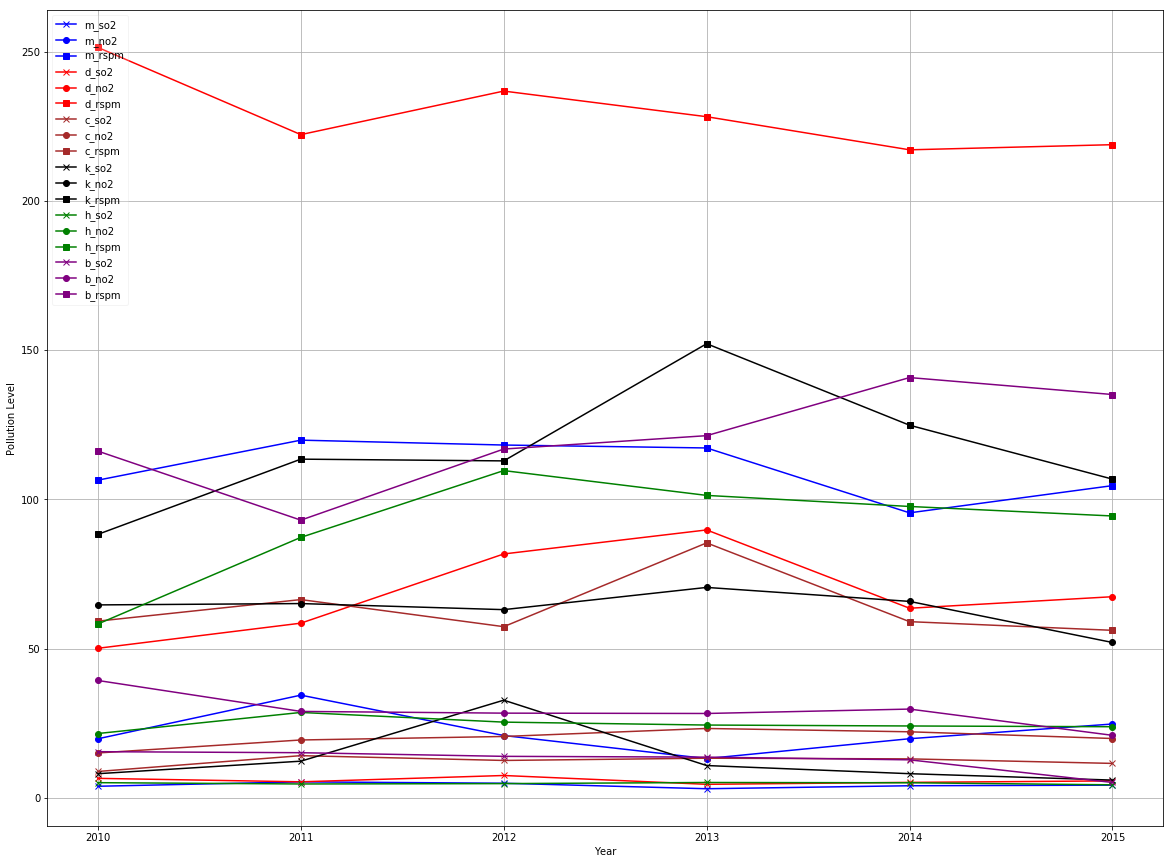

In [28]:
plt.figure(figsize=(20, 15))
# mumbai
plt.plot(df_mumbai_yr['so2'], label="m_so2", marker="x", color="blue")
plt.plot(df_mumbai_yr['no2'], label="m_no2", marker="o", color="blue")
plt.plot(df_mumbai_yr['rspm'], label="m_rspm", marker="s", color="blue")
# delhi
plt.plot(df_delhi_yr['so2'], label="d_so2", marker="x", color="red")
plt.plot(df_delhi_yr['no2'], label="d_no2", marker="o", color="red")
plt.plot(df_delhi_yr['rspm'], label="d_rspm", marker="s", color="red")
# chennai
plt.plot(df_chennai_yr['so2'], label="c_so2", marker="x", color="brown")
plt.plot(df_chennai_yr['no2'], label="c_no2", marker="o", color="brown")
plt.plot(df_chennai_yr['rspm'], label="c_rspm", marker="s", color="brown")
# kolkata
plt.plot(df_kolkata_yr['so2'], label="k_so2", marker="x", color="black")
plt.plot(df_kolkata_yr['no2'], label="k_no2", marker="o", color="black")
plt.plot(df_kolkata_yr['rspm'], label="k_rspm", marker="s", color="black")
# Hyderabad
plt.plot(df_hyderabad_yr['so2'], label="h_so2", marker="x", color="green")
plt.plot(df_hyderabad_yr['no2'], label="h_no2", marker="o", color="green")
plt.plot(df_hyderabad_yr['rspm'], label="h_rspm", marker="s", color="green")
# Bangaluru
plt.plot(df_bangaluru_yr['so2'], label="b_so2", marker="x", color="purple")
plt.plot(df_bangaluru_yr['no2'], label="b_no2", marker="o", color="purple")
plt.plot(df_bangaluru_yr['rspm'], label="b_rspm", marker="s", color="purple")
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.grid()
plt.legend(loc="upper left", fancybox=True, framealpha=0.2)
plt.show()

## Variation of pollution level across 12 months the year

In [29]:
df_mumbai_mth = df_mumbai.groupby(df_mumbai.date.dt.month).mean()
df_mumbai_mth.head()
df_delhi_mth = df_delhi.groupby(df_delhi.date.dt.month).mean()
df_delhi_mth.head()
df_chennai_mth = df_chennai.groupby(df_chennai.date.dt.month).mean()
df_delhi_mth.head()
df_kolkata_mth = df_kolkata.groupby(df_kolkata.date.dt.month).mean()
df_kolkata_mth.head()
df_hyderabad_mth = df_hyderabad.groupby(df_hyderabad.date.dt.month).mean()
df_hyderabad_mth.head()
df_bangaluru_mth = df_bangaluru.groupby(df_bangaluru.date.dt.month).mean()
df_bangaluru_mth.head()

,so2,no2,rspm
date,,,
1,11.632439,29.933648,146.738675
2,12.624724,31.422276,141.210333
3,12.583772,29.983862,132.062894
4,13.481138,28.646138,132.684207
5,13.086607,28.322887,115.813315


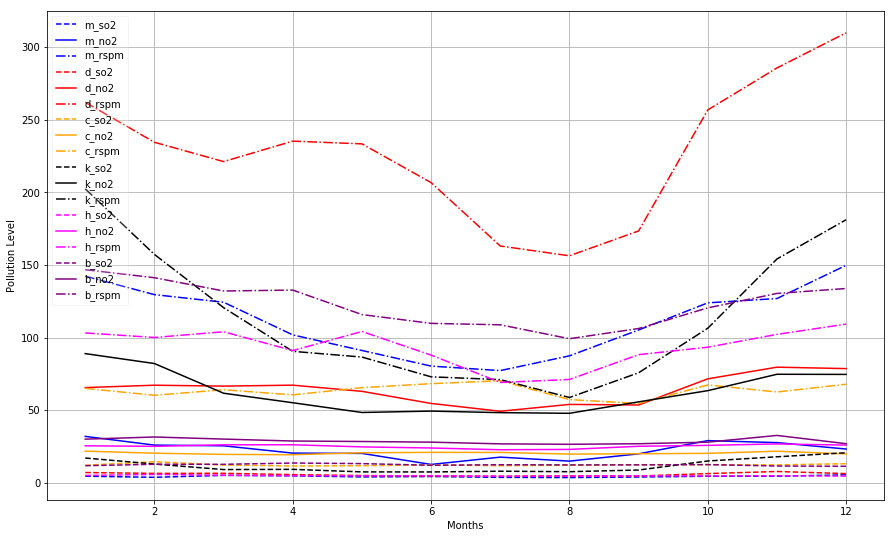

In [30]:
plt.figure(figsize=(15, 9))
# mumbai
plt.plot(df_mumbai_mth['so2'], label="m_so2", color="blue", linestyle="dashed")
plt.plot(df_mumbai_mth['no2'], label="m_no2", color="blue", linestyle="solid")
plt.plot(df_mumbai_mth['rspm'], label="m_rspm", color="blue", linestyle="dashdot")
# delhi
plt.plot(df_delhi_mth['so2'], label="d_so2", color="red", linestyle="dashed")
plt.plot(df_delhi_mth['no2'], label="d_no2", color="red", linestyle="solid")
plt.plot(df_delhi_mth['rspm'], label="d_rspm", color="red", linestyle="dashdot")
# chennai
plt.plot(df_chennai_mth['so2'], label="c_so2", color="orange", linestyle="dashed")
plt.plot(df_chennai_mth['no2'], label="c_no2", color="orange", linestyle="solid")
plt.plot(df_chennai_mth['rspm'], label="c_rspm", color="orange", linestyle="dashdot")
# kolkata
plt.plot(df_kolkata_mth['so2'], label="k_so2", color="black", linestyle="dashed")
plt.plot(df_kolkata_mth['no2'], label="k_no2", color="black", linestyle="solid")
plt.plot(df_kolkata_mth['rspm'], label="k_rspm", color="black", linestyle="dashdot")
# Hyderabad
plt.plot(df_hyderabad_mth['so2'], label="h_so2", color="magenta", linestyle="dashed")
plt.plot(df_hyderabad_mth['no2'], label="h_no2", color="magenta", linestyle="solid")
plt.plot(df_hyderabad_mth['rspm'], label="h_rspm", color="magenta", linestyle="dashdot")
# Bangaluru
plt.plot(df_bangaluru_mth['so2'], label="b_so2", color="purple", linestyle="dashed")
plt.plot(df_bangaluru_mth['no2'], label="b_no2", color="purple", linestyle="solid")
plt.plot(df_bangaluru_mth['rspm'], label="b_rspm", color="purple", linestyle="dashdot")
plt.xlabel("Months")
plt.ylabel("Pollution Level")
plt.grid()
plt.legend(loc="upper left", fancybox=True, framealpha=0.2)
plt.show()

In [31]:
df_mumbai_yr.reset_index(inplace=True)
df_mumbai_yr.rename(columns={"index": "serial_number"}, inplace=True)

df_delhi_yr.reset_index(inplace=True)
df_delhi_yr.rename(columns={"index": "serial_number"}, inplace=True)

df_chennai_yr.reset_index(inplace=True)
df_chennai_yr.rename(columns={"index": "serial_number"}, inplace=True)

df_kolkata_yr.reset_index(inplace=True)
df_kolkata_yr.rename(columns={"index": "serial_number"}, inplace=True)

df_hyderabad_yr.reset_index(inplace=True)
df_hyderabad_yr.rename(columns={"index": "serial_number"}, inplace=True)

df_bangaluru_yr.reset_index(inplace=True)
df_bangaluru_yr.rename(columns={"index": "serial_number"}, inplace=True)

In [32]:
df_mumbai_yr
# df_delhi_yr
# df_chennai_yr
# df_kolkata_yr
# df_hyderabad_yr
# df_bangaluru_yr

,date,so2,no2,rspm
0,2010,3.835821,19.751244,106.417910
1,2011,5.313653,34.369963,119.820513
2,2012,4.849372,20.836820,118.185654
3,2013,3.007519,13.116541,117.203008
4,2014,4.008439,19.766949,95.464135
5,2015,4.203704,24.697531,104.580247


## Summary of level of pollution in each city

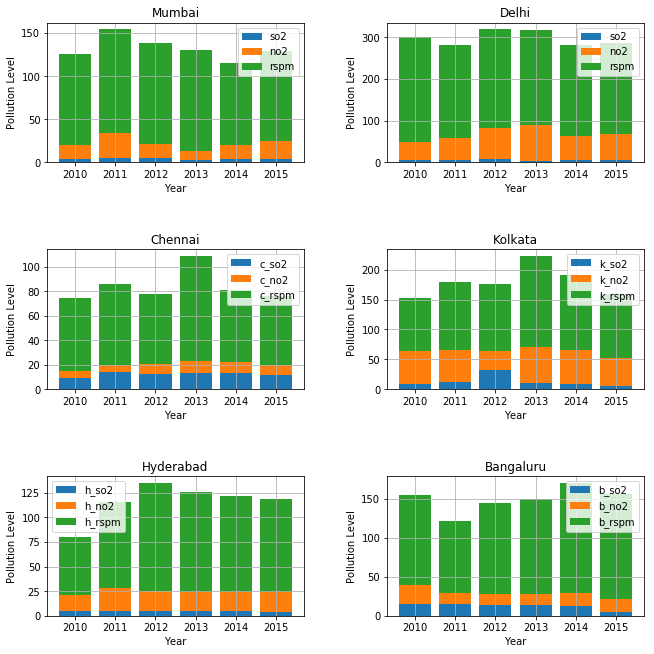

In [33]:
plt.subplots(figsize=(10, 10))

# Sub plot for Mumbai
plt.subplot(3, 2, 1)
plt.title("Summary of Each Major City")
plt.bar(df_mumbai_yr['date'], df_mumbai_yr['so2'], label="so2")
plt.bar(df_mumbai_yr['date'], df_mumbai_yr['no2'], bottom = df_mumbai_yr['so2'], label="no2")
plt.bar(df_mumbai_yr['date'], df_mumbai_yr['rspm'], bottom = df_mumbai_yr['no2'], label="rspm")
plt.title('Mumbai')
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.grid()
plt.legend()

# Sub plot for Delhi
plt.subplot(3, 2, 2)
plt.bar(df_delhi_yr['date'], df_delhi_yr['so2'], label="so2")
plt.bar(df_delhi_yr['date'], df_delhi_yr['no2'], bottom = df_delhi_yr['so2'], label="no2")
plt.bar(df_delhi_yr['date'], df_delhi_yr['rspm'], bottom = df_delhi_yr['no2'], label="rspm")
plt.title('Delhi')
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.grid()
plt.legend()

# Sub plot for Chennai
plt.subplot(3, 2, 3)
plt.bar(df_chennai_yr['date'], df_chennai_yr['so2'], label="c_so2")
plt.bar(df_chennai_yr['date'], df_chennai_yr['no2'], bottom = df_chennai_yr['so2'], label="c_no2")
plt.bar(df_chennai_yr['date'], df_chennai_yr['rspm'], bottom = df_chennai_yr['no2'], label="c_rspm")
plt.title('Chennai')
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.grid()
plt.legend()

# Sub plot for Kolkota
plt.subplot(3, 2, 4)
plt.bar(df_kolkata_yr['date'], df_kolkata_yr['so2'], label="k_so2")
plt.bar(df_kolkata_yr['date'], df_kolkata_yr['no2'], bottom = df_kolkata_yr['so2'], label="k_no2")
plt.bar(df_kolkata_yr['date'], df_kolkata_yr['rspm'], bottom = df_kolkata_yr['no2'], label="k_rspm")
plt.title('Kolkata')
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.grid()
plt.legend()

# Sub plot for Hydrabad
plt.subplot(3, 2, 5)
plt.bar(df_hyderabad_yr['date'], df_hyderabad_yr['so2'], label="h_so2")
plt.bar(df_hyderabad_yr['date'], df_hyderabad_yr['no2'], bottom = df_hyderabad_yr['so2'], label="h_no2")
plt.bar(df_hyderabad_yr['date'], df_hyderabad_yr['rspm'], bottom = df_hyderabad_yr['no2'], label="h_rspm")
plt.title('Hyderabad')
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.grid()
plt.legend()

# Sub plot for Bangaluru
plt.subplot(3, 2, 6)
plt.bar(df_bangaluru_yr['date'], df_bangaluru_yr['so2'], label="b_so2")
plt.bar(df_bangaluru_yr['date'], df_bangaluru_yr['no2'], bottom = df_bangaluru_yr['so2'], label="b_no2")
plt.bar(df_bangaluru_yr['date'], df_bangaluru_yr['rspm'], bottom = df_bangaluru_yr['no2'], label="b_rspm")
plt.title('Bangaluru')
plt.xlabel("Year")
plt.ylabel("Pollution Level")
plt.grid()
plt.legend()

plt.tight_layout(4)
plt.show()

In [42]:
df_bangaluru_yr

,date,so2,no2,rspm
0,2010,15.425380,39.282213,116.145336
1,2011,15.085726,28.916733,93.015842
2,2012,13.863308,28.338767,116.839789
3,2013,13.600587,28.226138,121.325991
4,2014,12.691114,29.700987,140.794076
5,2015,5.110803,20.904432,135.113146
